* Student name: Natalia Edelson
* Student pace: Flex
* Scheduled project review date/time: April 6, 2023
* Instructor name: Morgan Jones

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.1">Importing Libraries</a></span></li><li><span><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-0.2">Importing the dataset</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Data---Target" data-toc-modified-id="Distribution-of-Data---Target-0.2.1">Distribution of Data - Target</a></span></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-0.2.2">Cleaning the data</a></span></li></ul></li><li><span><a href="#Pre-process-Text" data-toc-modified-id="Pre-process-Text-0.3">Pre-process Text</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-0.4">Word Cloud</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-0.5">Split Data</a></span></li></ul></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-1">Vectorization</a></span><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-1.1">TF-IDF</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-1.2">CountVectorizer</a></span></li></ul></li><li><span><a href="#Word-Embedding-using-Word2Vec" data-toc-modified-id="Word-Embedding-using-Word2Vec-2">Word Embedding using Word2Vec</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3">Modeling</a></span><ul class="toc-item"><li><span><a href="#Interpreting-results-of-the-best-performing-model" data-toc-modified-id="Interpreting-results-of-the-best-performing-model-3.1">Interpreting results of the best performing model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Please-see-part-2-(deep-learning)--in-the-colab-notebook-on-GitHub." data-toc-modified-id="Please-see-part-2-(deep-learning)--in-the-colab-notebook-on-GitHub.-3.1.0.1">Please see part 2 (deep learning)  in the colab notebook on GitHub.</a></span></li></ul></li></ul></li></ul></li></ul></div>

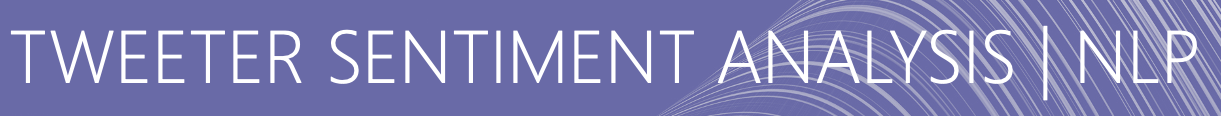

# *Part 1*

### Importing Libraries

In [2]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time
# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, 
                        module='gensim')
import gensim
import os

import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

### Importing the dataset

In [5]:
# Importing the dataset  
DATASET_COLUMNS=["sentiment", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
ta_df = pd.read_csv('training.1600000.processed.noemoticon.csv', 
                    encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

ta_df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# Sampling 30,000 tweets randomly
ta_df = ta_df.sample(30000,random_state=42)

In [7]:
# Checking the size of the data
ta_df.shape

(30000, 6)

In [8]:
# Looking into the type of data. Noting the data does not seem to have 
# any missing values.

ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 541200 to 1027373
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30000 non-null  int64 
 1   ids        30000 non-null  int64 
 2   date       30000 non-null  object
 3   flag       30000 non-null  object
 4   user       30000 non-null  object
 5   tweet      30000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [9]:
# Checking the percentage of null values
ta_df.isna().mean()*100

sentiment    0.0
ids          0.0
date         0.0
flag         0.0
user         0.0
tweet        0.0
dtype: float64

In [10]:
# Checking to see that ‘flag’ column only has one value 'NP_QUERY'
ta_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [11]:
# Dropping ‘flag’ and ‘ids’ columns
ta_df.drop(['flag','ids'], axis=1, inplace = True)

In [12]:
# Checking that the changes took place
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


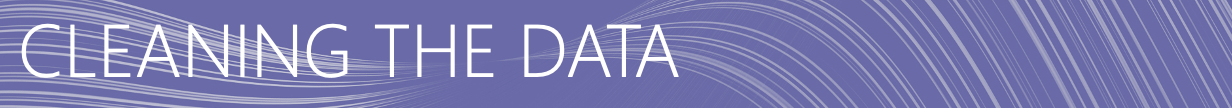

In [13]:
# Checking length 
print('length of data is', len(ta_df))

length of data is 30000


#### Distribution of Data - Target 

In [14]:
# Check unique values in the sentiment column
ta_df['sentiment'].unique()

array([0, 4])

The value_counts method is used to count the number of occurrences of each unique value in the sentiment column, and the "normalize=True" argument is used to calculate the percentages instead of the counts.

In [16]:
# Checking distribution
ta_df['sentiment'].value_counts()

4    15001
0    14999
Name: sentiment, dtype: int64

In [13]:
# Replacing the value 4 -->1 for ease of understanding.
# 0 = negative, 1 = positive
ta_df['sentiment'] = ta_df['sentiment'].replace(4,1)
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


[Text(0.5, 1.0, 'Count of Tweets per Sentiment')]

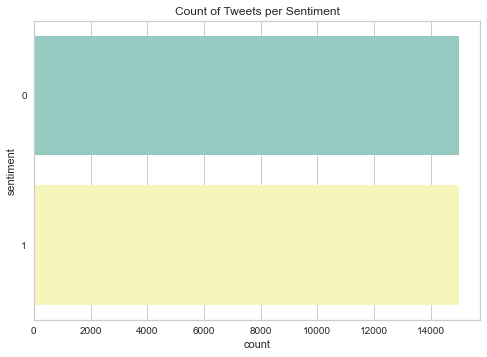

In [14]:
# Plot the count plot for the target labels.

# Setting p to plot of Emotion

p = sns.countplot(data = ta_df, y = 'sentiment', palette="Set3") 
p.set(xlabel = 'count') #Labling X
p.set(ylabel = 'sentiment') #Labling Y
p.set(title = "Count of Tweets per Sentiment")

In [15]:
# Displays the count of columns and rows in the DataFrame.

print('Count of columns in the data is:  ', len(ta_df.columns))
print('Count of rows in the data is:  ', len(ta_df))

Count of columns in the data is:   4
Count of rows in the data is:   30000


#### Cleaning the data

* Checking and handling NaN values
* Drop duplicates



In [16]:
# Dropping NaN values

ta_df.dropna(inplace=True)

In [17]:
len(ta_df.duplicated(keep='last'))

30000

In [18]:
# Dropping duplicates
ta_df.drop_duplicates()
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 541200 to 1027373
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30000 non-null  int64 
 1   date       30000 non-null  object
 2   user       30000 non-null  object
 3   tweet      30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


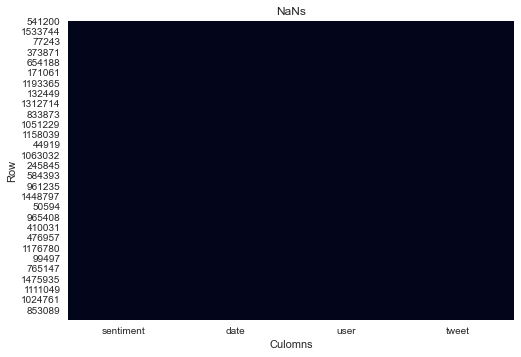

In [19]:
# Checking for Null values.  We use the heatmap code which 
# shows the contrast well.

sns.heatmap(ta_df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()

Now that our data is clean and without duplicates, we can proceed to preprocess the tweets for our machine learning models. 

In [20]:
# Creating an independent copy  
ta_df_copy = ta_df.copy()

### Pre-process Text

We will use text processing to allow the data to be more digestible for model use later in this project. This is an integral step in Natural Language Processing (NLP). 


The Preprocessing steps taken are:

* Converting to lower case letters: Each text will be transferred to a lower case letter.

* Removing stop words: Remove common words like "a", "an", "the", etc., which don't carry much meaning and can be safely removed without affecting the model's performance.

* Removing Words  with 2 letters: Words with length less than 2 are removed.

* Replacing http with space: Links starting with "http" or "https" or "www" are replaced by " 
".

* Stemming to reduce words to their root form to remove any variations of the same word. 

In [21]:
# Defining a preprocessing function for cleaning and preprocessing 
#text data.

tqdm.pandas() # Adding the progress bar
ps = PorterStemmer() # Defining stemming words wiht ps

# Removes URLs and non-alphanumeric 
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 

# Replace 3 or more consecutive letters by 2 letter.
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

stop_words = set(stopwords.words("english")) # Creating a set of 
#English stopwords 


# Defining  the preprocessing function

def preprocess(text,apply_stem=True):
    
# Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    tokens = [] 
    for token in text.split():
        if token not in stop_words:
        # Checking if the word is not a stopword  
            if apply_stem:
        # Stemming to the word using the PorterStemmer if True
                tokens.append(ps.stem(token))  
            else:
        # Adding the original word if stemming is not 
        # applied (for wordcloud)
                tokens.append(token) 
        # Joining and retuning the list of tokenized words 
        # into a one string
    return " ".join(tokens)

In [22]:
# Creating a new column apply a function to each row

ta_df['clean_tweet'] = (
    ta_df['tweet'].progress_apply(lambda x:preprocess(x,True))
)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [23]:
ta_df['clean_tweet'].head()

541200                                          ahh hope ok
750                                   cool tweet app razr 2
766711    know famili drama lame hey next time u hang ki...
285055    school email open geographi stuff revis stupid...
705995                                 upper airway problem
Name: clean_tweet, dtype: object

In [24]:
# Creating a new column apply a function to each row

ta_df['clean_tweet_wt_stem'] = (
    ta_df['tweet']
    .progress_apply(lambda x: preprocess(x, False))
)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [25]:
# ta_df.drop('clean_tweets',axis=1,inplace=True)

In [26]:
# Checking that the change has taken place. 
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem


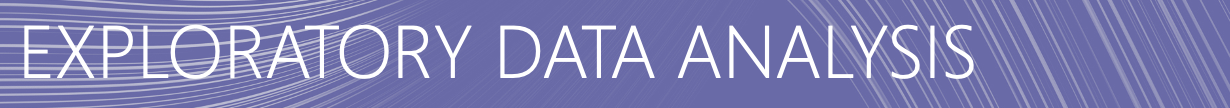

In [27]:
ta_df['clean_tweet_wt_stem']

541200                                           ahh hope ok
750                                   cool tweet apps razr 2
766711     know family drama lame hey next time u hang ki...
285055     school email open geography stuff revise stupi...
705995                                 upper airways problem
                                 ...                        
263962     bout go eat eat sushi phoboy86 house hopefully...
1540392                     guess bus ride tour bus good job
1549636                                     hmm might go bed
706868     sounds suspiciously like year million dreams h...
1027373                                              problem
Name: clean_tweet_wt_stem, Length: 30000, dtype: object

### Word Cloud

We are creating a wordcloud with masking which allows us to visualize words in a specific shape of thumbs up and down.

In [28]:
def red_color_func(word, font_size, position, orientation, 
                   random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  

In [29]:
# Function to help us generate wordcloud
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  

In [30]:
# Storing clean tweets
tweets = ta_df['clean_tweet_wt_stem']

With these Series objects containing the preprocessed text, you can perform further analysis or visualization on the negative and positive tweets separately. We will be able to create separate word clouds for each sentiment group or calculate the most frequent words in each group.

In [31]:
# Storing the rows with a sentiment value of 0,
# which represents negative sentiment. 
tweet_negative = ta_df[ta_df['sentiment']==0]

# Storing the rows with a sentiment value of 1, 
# which represents positive sentiment. 
tweet_positive = ta_df[ta_df['sentiment']==1]

In [32]:
# Storing the preprocessed text of the tweets with negative sentiment 
tweet_negative = tweet_negative['clean_tweet_wt_stem']
# Storing the preprocessed text of the tweets with positive sentiment 
tweet_positive = tweet_positive['clean_tweet_wt_stem']

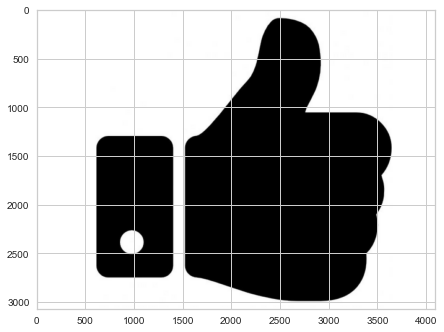

In [33]:
# Resizing  it to a 20x20 size using the Image.ANTIALIAS filter
img = Image.open('upvote.png')
img.resize((20, 20), Image.ANTIALIAS)
plt.imshow(img) # show output

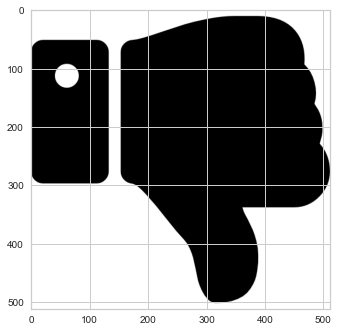

In [34]:
# Resizing  it to a 20x20 size using the Image.ANTIALIAS filter
mask_d = Image.open('final.png')
mask_d.resize((20, 20), Image.ANTIALIAS)
plt.imshow(mask_d) # show output

In [35]:
def wc(data, mask,fname):
    
    plt.figure(figsize = (50,50))
    
    wc = WordCloud(width = 300, height = 200,background_color='white',
                   max_words = 50,  max_font_size =300,
                   colormap='rainbow',mask=mask)
    
    wc.generate(' '.join(data))
    
    plt.imshow(wc)
    plt.grid(visible=False)
    plt.savefig(f'{fname}.png',dpi=200)
#   plt.axis('off')

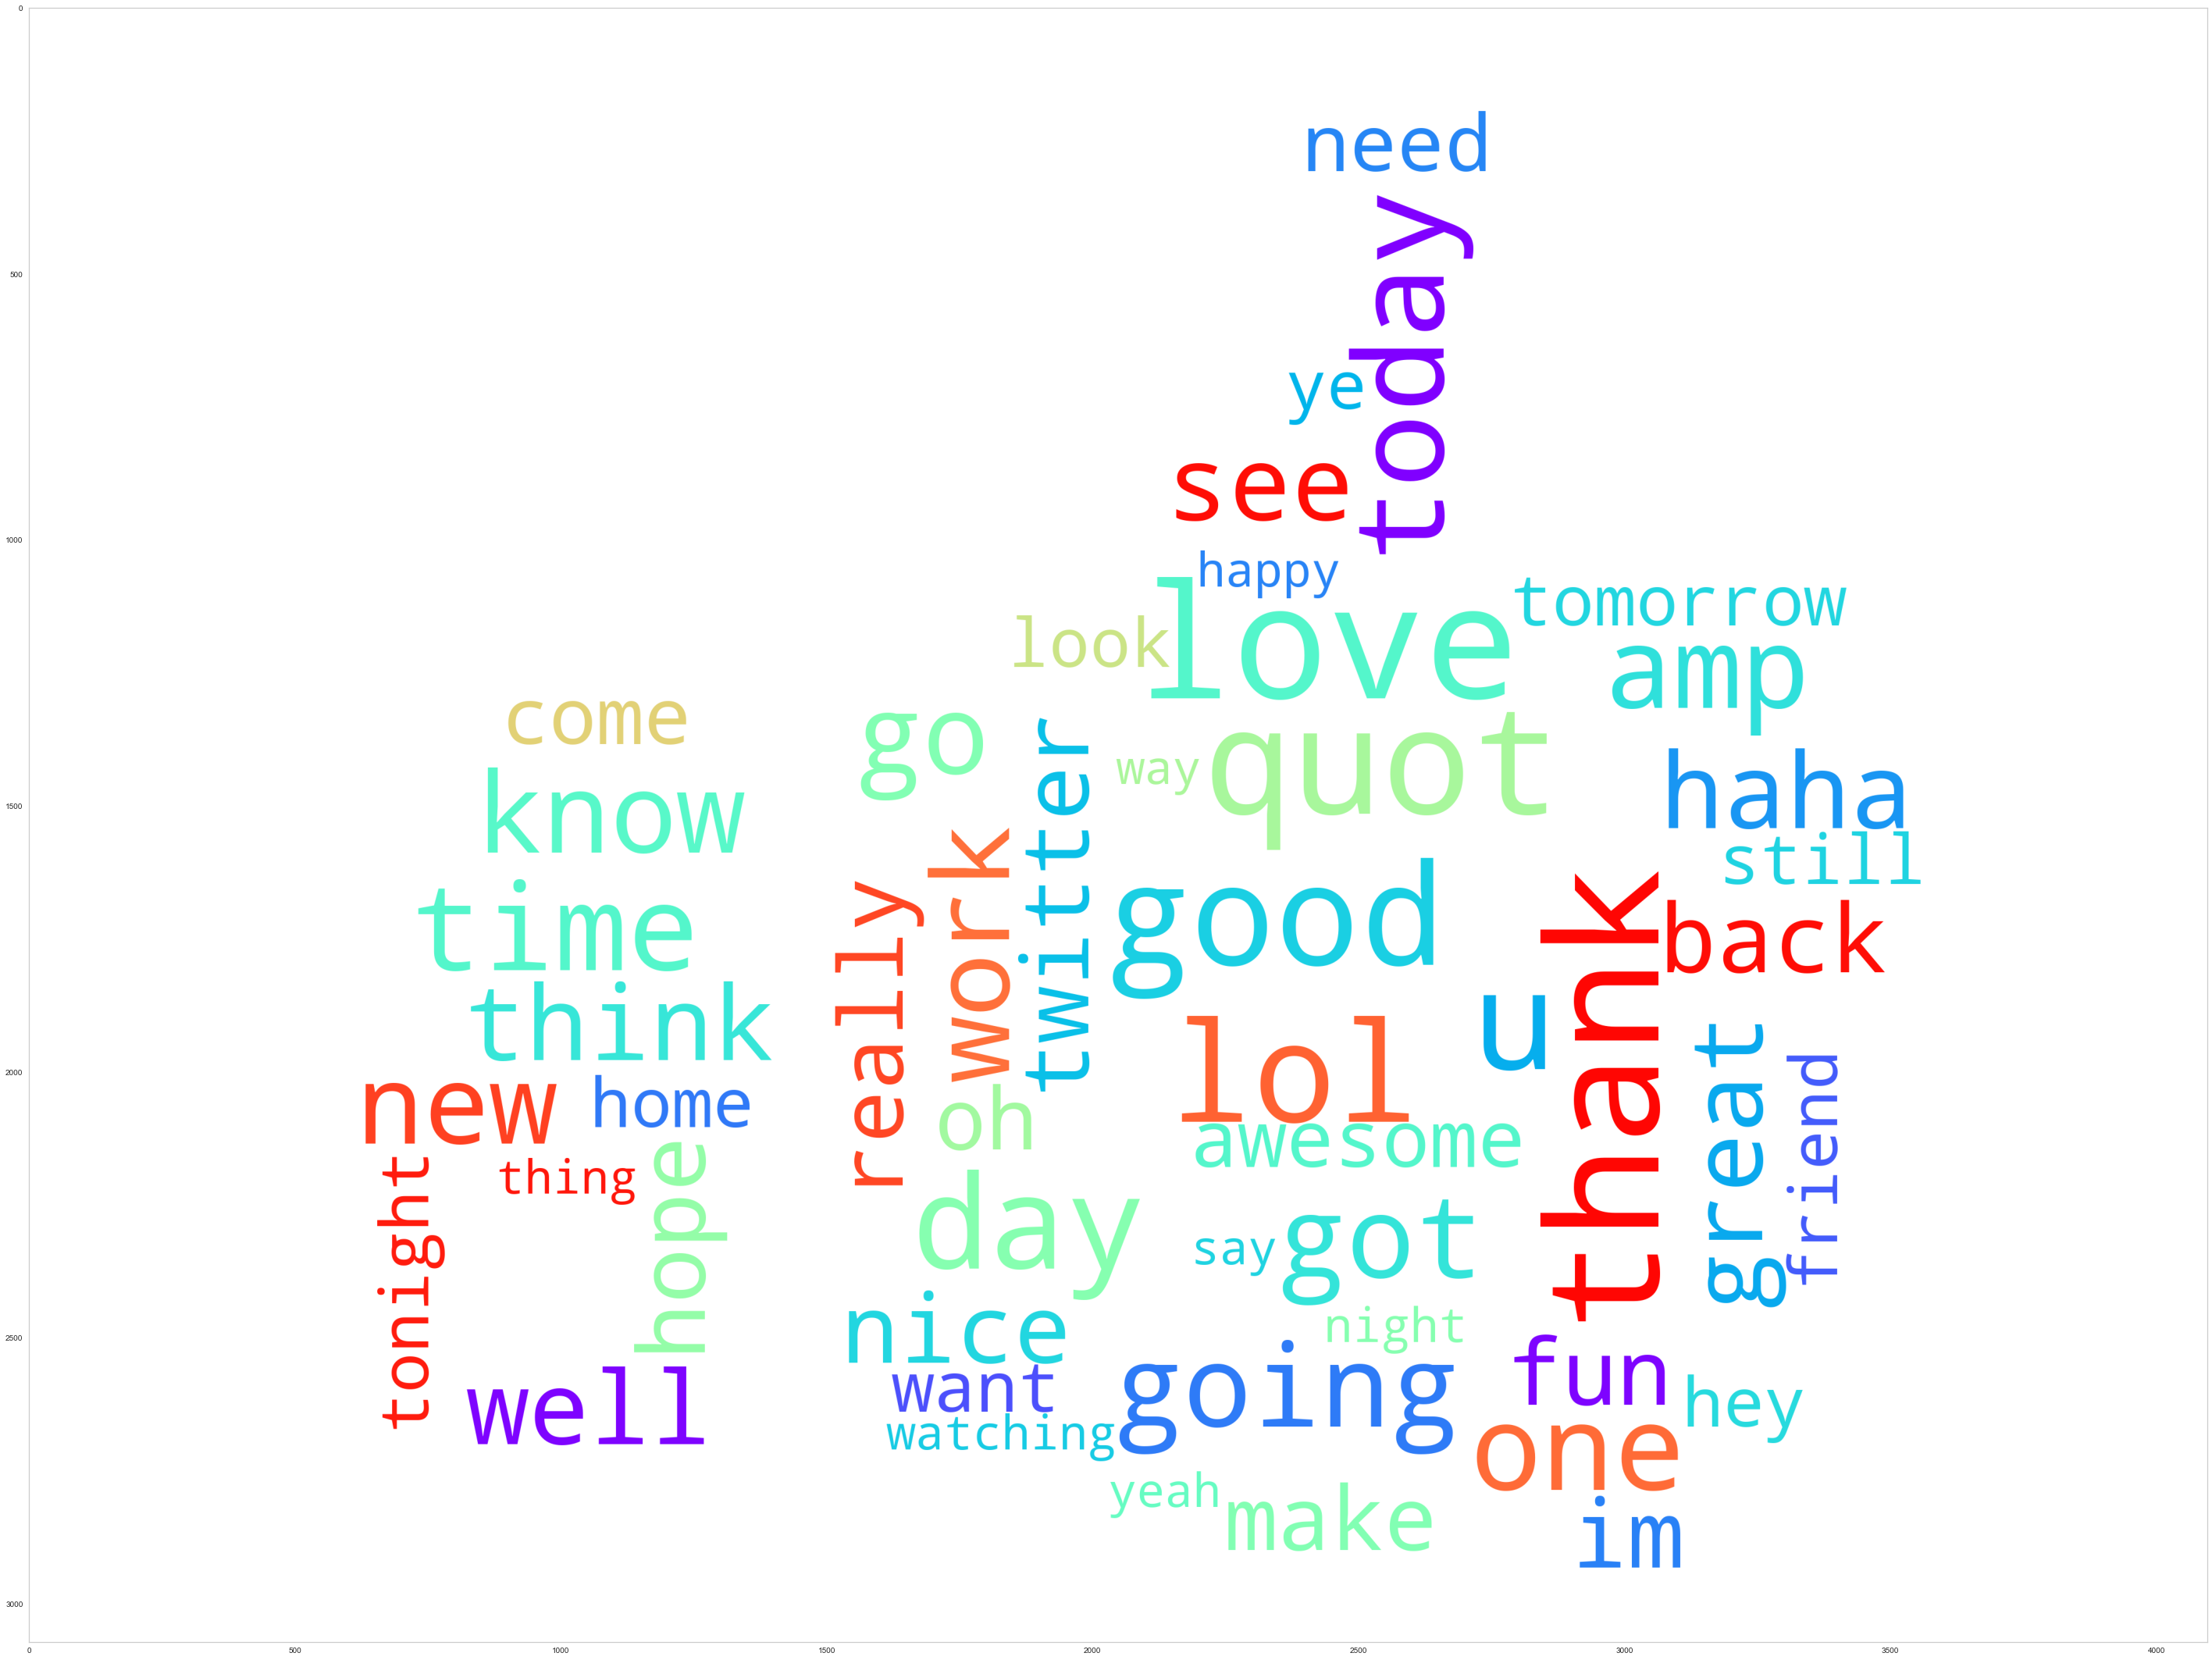

In [36]:
mask_pos = np.array(Image.open('upvote.png'))

wc(tweet_positive, mask_pos,'positive')

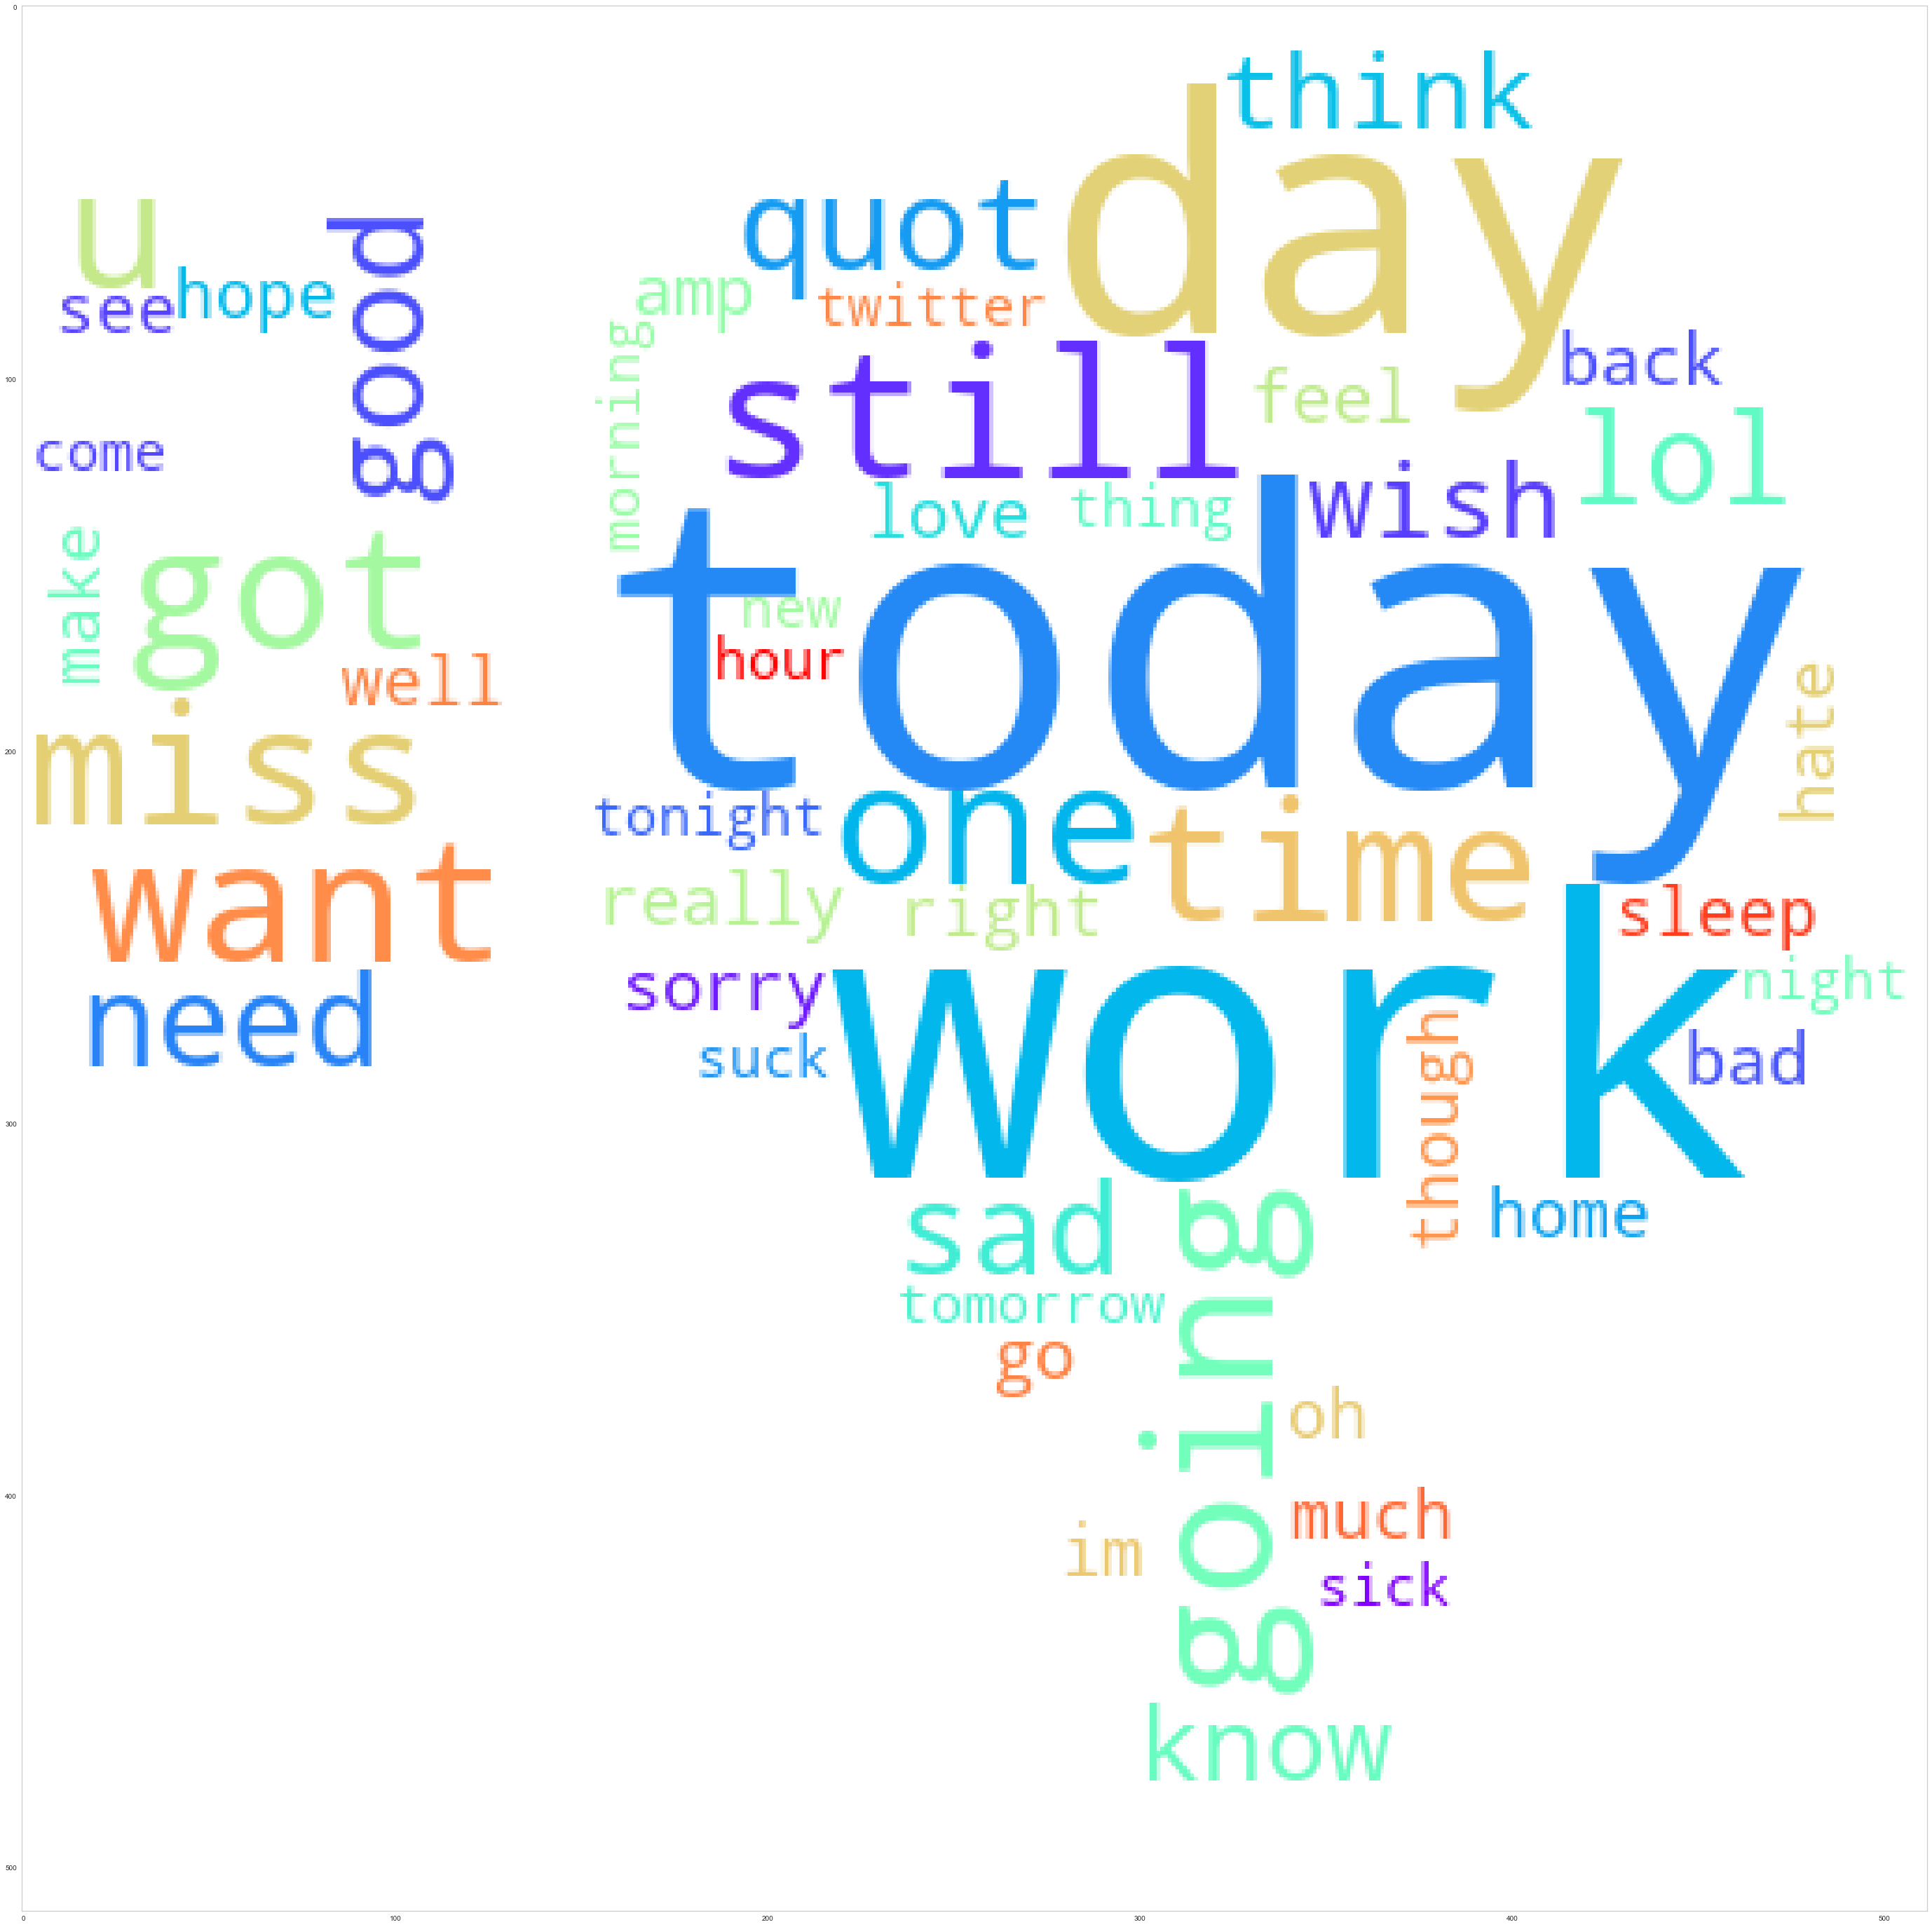

In [37]:
mask_neg = np.array(Image.open('final.png'))
wc(tweet_negative, mask_neg, 'negative')

In [38]:
pos_df = (
    ta_df['clean_tweet']
    .loc[ta_df['sentiment'] == 1]
    .progress_apply(lambda line: line.split())
)

  0%|          | 0/15001 [00:00<?, ?it/s]

In [39]:
    ta_df['clean_tweet']
    .loc[ta_df['sentiment'] == 0]
    .progress_apply(lambda line: line.split())
)

  0%|          | 0/14999 [00:00<?, ?it/s]

In [40]:
tokens = [] #Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list


for row in pos_df:
    tokens.extend(row) #Populating token list from dataframe
for row in pos_df:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in neg_df:
    tokens_neg.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') 
# Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') 
# Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') 
# Print number of negative tokens


Total Corpus Tokens: 106790
Number of Positive Tokens: 106790
Number of Negative Tokens: 109861


The function creates two bar plots. The first plot shows the top 10 most frequent positive n-grams, and the second plot shows the top 10 most frequent negative n-grams.

This will create and display the bar plots for unigrams (1-grams) of positive and negative tokens. You can change the input integer to display n-grams of different sizes: bigrams (2-grams) or trigrams (3-grams).

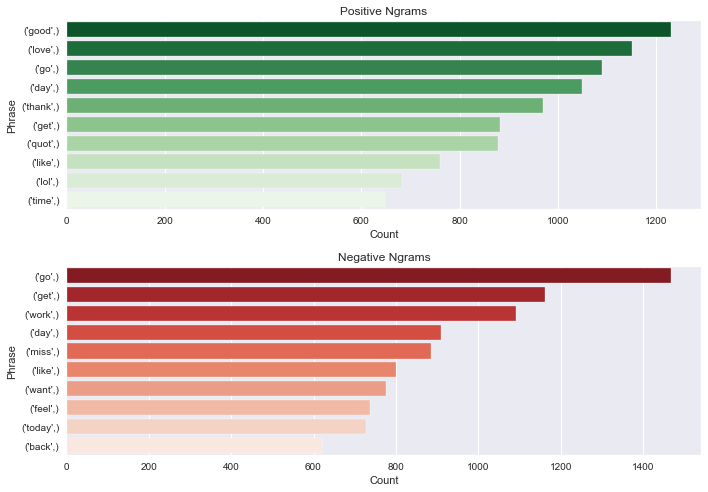

In [42]:
# Defining function

def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg): 
     #Setting up positive ngram
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10]
    #Setting up negative ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] 
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    
    #Renaming positive plot
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase',
                                                    0: 'Count'}) 
    #Renaming negative plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase',
                                                    0: 'Count'}) 
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos,
                    # Assigning barplot to positive ngrams
                    palette = 'Greens_r').set(title = 'Positive Ngrams') 
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                    # Assigning barplot to negative ngrams
                   palette = 'Reds_r').set(title = 'Negative Ngrams') 
        
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

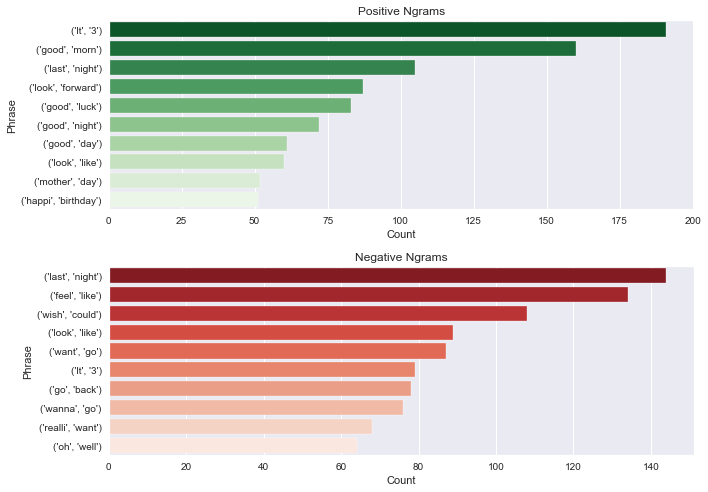

In [43]:
make_ngram(2) #Plot 2 word ngrams

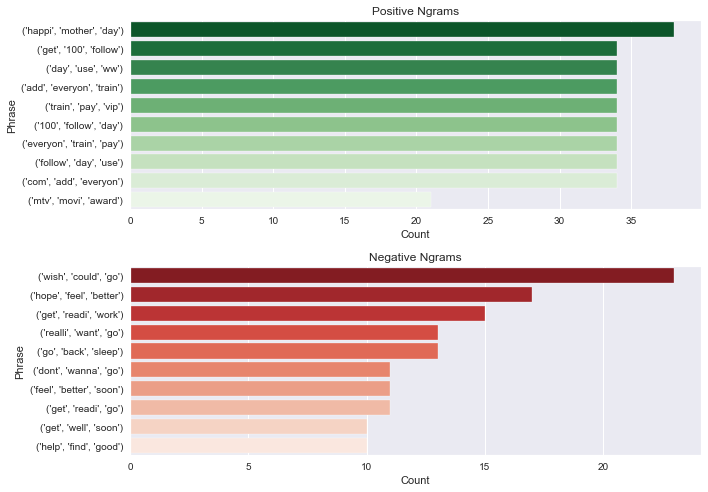

In [44]:
make_ngram(3) #Plot 3 word ngrams

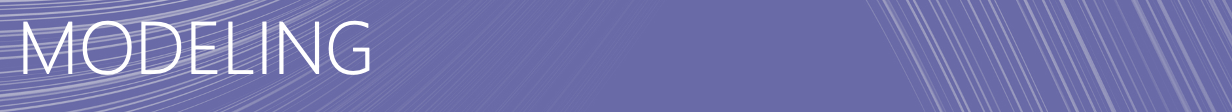

### Split Data 

In [45]:
# Splitting data target and clean tweets

X = ta_df['clean_tweet'] # 1,000,000

y = ta_df['sentiment'] # 1,000,000

In [46]:
# List of unique sentiment values

list(set(ta_df['sentiment']))

[0, 1]

In [47]:
# View independent 

y.head()

541200    0
750       0
766711    0
285055    0
705995    0
Name: sentiment, dtype: int64

In [48]:
# Count values 
ta_df['sentiment'].value_counts()

1    15001
0    14999
Name: sentiment, dtype: int64

In [49]:
# Spliting your dataset into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 43)

In [50]:
# Checking shape of train and test data

print(X_train.shape, y_train.shape) 
print(X_test.shape , y_test.shape) 

(22500,) (22500,)
(7500,) (7500,)


## Vectorization

We will utilize three different vectorization approaches: TF-IDF, Vector Count, and Word2Vec. We will examine which vector approach has worked best among the machine learning models. 

### TF-IDF


TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word to a document in a corpus. It assigns more weight to words that are less frequent in the entire corpus and less weight to words that are more common. The calculation involves both: Term Frequency (TF) and Inverse Document Frequency (IDF).

**IDF: IDF** = log( (count of documents) / (count of documents containing the word) )

**TF: TF** = (count of the frequency of a word in a document) / (count of words in a document)
https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [75]:
# Initializing TFIDF 
vectoriser_tfidf = TfidfVectorizer()

In [76]:
# Fit the data 
vectoriser_tfidf.fit(X_train)

print('Number of feature words:', 
      len(vectoriser_tfidf.get_feature_names_out()))

Number of feature words: 18078


In [77]:
# Converting the tweets in train and test data into TFIDF features  
X_train_tfidf = vectoriser_tfidf.transform(X_train)
X_test_tfidf  = vectoriser_tfidf.transform(X_test)

### CountVectorizer

Count vectorization is a simple technique to vectorize words by counting their frequency in a document. It creates a matrix in which each word is represented by its count in the corpus.

In [78]:
# Initializing countvector 
vectorizer_vc = CountVectorizer()
# Fitting countvector
vectorizer_vc.fit(X_train)

CountVectorizer()

In [79]:
# Converting tweets in train and test data into countvector features  

X_train_vc = vectorizer_vc.transform(X_train)
X_test_vc  = vectorizer_vc.transform(X_test)

## Word Embedding using Word2Vec

Word2Vec is a neural network-based technique that learns a vector representations of words from large amounts of text data. It represents each word as a  vector in a multi dimensional space - and the distance between vectors(words) reflects the semantic similarity between words. 

In [58]:
# Initializing corpus using funciton progress_apply 
# to go though each row and tokenize
corpus = X.progress_apply(lambda line:line.split())

  0%|          | 0/30000 [00:00<?, ?it/s]

In [59]:
# View corpus
corpus

541200                                       [ahh, hope, ok]
750                              [cool, tweet, app, razr, 2]
766711     [know, famili, drama, lame, hey, next, time, u...
285055     [school, email, open, geographi, stuff, revis,...
705995                              [upper, airway, problem]
                                 ...                        
263962     [bout, go, eat, eat, sushi, phoboy86, hous, ho...
1540392               [guess, bu, ride, tour, bu, good, job]
1549636                                [hmm, might, go, bed]
706868     [sound, suspici, like, year, million, dream, h...
1027373                                            [problem]
Name: clean_tweet, Length: 30000, dtype: object

In [60]:
# Train Word2Vec Model on corpus
import warnings
 
warnings.filterwarnings(action = 'ignore')
 

model = Word2Vec(corpus, 
                 min_count=1,  # minimum frequency count of words
                 vector_size=200,  # dimensionality of the word vectors
                 workers=os.cpu_count(),            # Number of processors
                 sg=1                  # 1 for skip-gram
                ) 

In [62]:
# Creating a new column of tokenized tweets
ta_df['tokens'] = (
    ta_df['clean_tweet']
    .progress_apply(lambda line: line.split())
)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [63]:
# Checking that change took place
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"


In [64]:
# Filtering out any rows where the tokens column is an empty list.
ta_df = ta_df[
    ta_df['tokens']
    .apply(lambda line: True if len(line) else False)
]

In [66]:
# View tokens
ta_df['tokens']

541200                                       [ahh, hope, ok]
750                              [cool, tweet, app, razr, 2]
766711     [know, famili, drama, lame, hey, next, time, u...
285055     [school, email, open, geographi, stuff, revis,...
705995                              [upper, airway, problem]
                                 ...                        
263962     [bout, go, eat, eat, sushi, phoboy86, hous, ho...
1540392               [guess, bu, ride, tour, bu, good, job]
1549636                                [hmm, might, go, bed]
706868     [sound, suspici, like, year, million, dream, h...
1027373                                            [problem]
Name: tokens, Length: 29855, dtype: object

In [68]:
# Storing the tokenized text data and corresponding sentiment labels  
X_w2v = ta_df['tokens']
y_w2v = ta_df['sentiment']

In [69]:
# Length of the embedding 
len(X_w2v)

29855

In [70]:
# model.wv.get_vector('there')

In [71]:
# Creating a set of all words in the vocabulary of a trained Word2Vec model
all_word2vec_vocab = set(model.wv.key_to_index)

In [81]:
# Averaging the embedding of a list of tokens
def get_embed(token_list):
    n = len(token_list)  # Calculating the length 
    embed = np.zeros((200)) # Initializing array of zeros with length 200
    for token in token_list: # Iterating over each token
        # Checking if the token is present in the Word2Vec v
        if token in all_word2vec_vocab: 
            # If so, embedding vector is added
            embed = embed + model.wv.get_vector(token) 
       
    else: # if not  in the vocabulary of Word2Vec
            # Using levenshtein distance between the token and takes 2nd element
            temp = sorted([(textdistance.levenshtein.normalized_distance(e, token),
                            e) for e in all_word2vec_vocab],reverse=False)[0][1]
            embed = embed + model.wv.get_vector(temp) #  Adding the selected word 
    return embed/n # Averaging of the word embeddings

# https://radimrehurek.com/gensim/models/keyedvectors.html

In [82]:
# Applying the function to each row  (200 dimensional embedding)
X_w2v_embed = X_w2v.progress_apply(get_embed)

  0%|          | 0/29855 [00:00<?, ?it/s]

In [83]:
# View embedding 
X_w2v_embed

541200     [0.06851391276965539, -0.09154102951288223, -0...
750        [0.034500939678400754, -0.0822992317378521, -0...
766711     [0.06930903100261562, -0.07717739801706844, -0...
285055     [0.018783764928230084, -0.12192256841808558, -...
705995     [0.01074135295736293, -0.06879128531242411, 0....
                                 ...                        
263962     [0.02220468013204963, -0.1353233720668975, -0....
1540392    [0.07094248304409641, -0.08008804558111089, -0...
1549636    [0.04116647597402334, -0.10027825180441141, -0...
706868     [0.027969976741587743, -0.08249159273691475, -...
1027373    [0.0009594860021024942, -0.1414019614458084, -...
Name: tokens, Length: 29855, dtype: object

In [85]:
# Creating a dataframe
df_new = pd.DataFrame(X_w2v_embed)

In [86]:
# Reseting index
df_new.reset_index(drop=True,inplace=True)

In [ ]:
# View Dataframe
df_new.head()

In [88]:
#  Adding column numbers corresponding to the integers in the list 
#(converted from array)  
df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), 
                                        index= df_new.index)

In [89]:
# Dropping tokens
df_new.drop('tokens',axis=1,inplace=True)

In [90]:
# View data frame
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.068514,-0.091541,-0.103803,0.324743,0.097741,-0.216004,0.068874,0.436102,-0.065999,0.223281,...,0.238569,-0.022422,-0.255774,-0.390074,0.168742,0.049245,0.218371,-0.222129,-0.031601,-0.288838
1,0.034501,-0.082299,-0.048294,0.174695,0.182607,-0.286788,0.030019,0.316800,-0.020411,0.094941,...,0.138042,0.089228,-0.140693,-0.206129,0.158259,0.079793,0.177223,-0.150253,-0.099367,-0.100311
2,0.069309,-0.077177,-0.095453,0.218893,0.107716,-0.263946,0.037270,0.386705,-0.013344,0.164781,...,0.153256,-0.006824,-0.160817,-0.271164,0.129138,0.043126,0.209872,-0.175534,-0.100320,-0.189743
3,0.018784,-0.121923,-0.020300,0.237091,0.148512,-0.247636,0.019359,0.403607,-0.119163,0.210584,...,0.190316,-0.027800,-0.132745,-0.239512,0.129107,0.130530,0.169645,-0.183929,-0.057219,-0.191498
4,0.010741,-0.068791,0.008459,0.073478,0.079290,-0.127433,0.000541,0.197276,-0.069902,0.054934,...,0.071078,-0.020701,-0.053897,-0.096073,0.080073,0.044467,0.086124,-0.064051,-0.043968,-0.049111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29850,0.022205,-0.135323,-0.011604,0.220139,0.107597,-0.204771,-0.014877,0.404414,-0.143336,0.182874,...,0.162679,-0.069748,-0.140247,-0.224069,0.099930,0.058649,0.138150,-0.194637,-0.083923,-0.195265
29851,0.070942,-0.080088,-0.034401,0.194365,0.149497,-0.248896,0.053803,0.404973,-0.093688,0.147472,...,0.177343,-0.014140,-0.191889,-0.265448,0.135265,0.053723,0.190758,-0.211624,-0.074445,-0.202239
29852,0.041166,-0.100278,-0.016394,0.245068,0.108878,-0.250209,0.065530,0.470274,-0.164613,0.206514,...,0.171219,-0.089557,-0.173738,-0.343948,0.090402,0.098926,0.226627,-0.201135,-0.116833,-0.238630
29853,0.027970,-0.082492,-0.038959,0.136888,0.159569,-0.186139,-0.029539,0.321192,-0.009501,0.076804,...,0.140570,0.029845,-0.096430,-0.142871,0.094162,0.038699,0.122295,-0.148296,-0.062378,-0.125586


In [91]:
# Splitting the embedding data innto training and testing sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    df_new, y_w2v, test_size=0.25, random_state=43
)

## Modeling 

The 'Train_Test_Scores' function returns the evaluation metrics (train_acc, test_acc, precision, recall, f1) as output. We will use these metrics can to evaluate and compare different machine learning models.

In [80]:
# Building a function that will fit the model and 
# then fit it to produce predicted values. 

def Train_Test_Scores(model,X_train,y_train,X_test,y_test,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    # Allowing the display to switch off for later on when 
    # I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    cm = confusion_matrix(y_test,y_preds)
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=model.classes_)
        disp.plot()
        plt.show()
          
          
    return train_acc,test_acc,precision,recall,f1

We built a loop we store the results of three machine learning models (GaussianNB RandomForest XGboost) applied to three vectorization techniques (TF-IDF, CountVector, and Word2Vec). WE create a new DataFrame that has columns for the Vectorizer used, the Model used, and various evaluation metrics such as Train Accuracy, Test Accuracy, Precision, Recall, and F1 Score.

In [92]:
%%time
# Creating a data frame to collect all the results 
# and evaluate them

models_DataFrame = pd.DataFrame(columns=['Vectorizer','Model','Train_Accuracy',
                                         'Test_Accuracy',
                                         'Precision',
                                         'Recall',
                                         'F1_score'])
list_models = [GaussianNB(),
              RandomForestClassifier(n_jobs=-1),
               XGBClassifier(n_jobs=-1)
              ]

model_names = 'GaussianNB RandomForest XGboost'.split()

from tqdm import tqdm
x_probs  = []
predictions = []
for vector in ('TF-IDF','CountVector', 'Word2Vec'):
    print(vector)
    if vector == "TF-IDF":
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
        
    elif vector == 'CountVector':
        x_train_temp = X_train_vc.toarray()
        x_test_temp = X_test_vc.toarray()
        
    elif vector == 'word2vec':
        x_train_temp = X_train_w2v.toarray()
        x_test_temp = X_test_w2v.toarray()
        
    for model, model_name in tqdm(zip(list_models, model_names)):
        print(model)
        train_acc, test_acc, precision, recall, f1 = Train_Test_Scores(
        model, x_train_temp, y_train, x_test_temp, y_test)

    #     x_probs.append(x_prob)
    #     pipe_models.append(pipe_model)
        models_DataFrame.loc[len(models_DataFrame)] = [vector,model_name,train_acc,
                                                       test_acc,precision,recall,f1]
        

TF-IDF


0it [00:00, ?it/s]

GaussianNB()


1it [08:56, 536.25s/it]

RandomForestClassifier(n_jobs=-1)


2it [17:02, 507.05s/it]

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[16:35:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3it [1:51:06, 2222.06s/it]


CountVector


0it [00:00, ?it/s]

GaussianNB()


1it [02:47, 167.58s/it]

RandomForestClassifier(n_jobs=-1)


2it [47:03, 1631.06s/it]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[18:11:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3it [1:08:16, 1365.50s/it]
0it [00:00, ?it/s]

Word2Vec
GaussianNB()


1it [00:41, 41.56s/it]

RandomForestClassifier(n_jobs=-1)


2it [02:27, 79.16s/it]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[18:49:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3it [38:10, 763.66s/it] 

CPU times: user 2h 38min 6s, sys: 4h 45min 57s, total: 7h 24min 3s
Wall time: 3h 37min 35s


In [93]:
models_DataFrame

,Vectorizer,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_score
0,TF-IDF,GaussianNB,0.754800,0.534400,0.587083,0.216774,0.316634
1,TF-IDF,RandomForest,0.994978,0.738400,0.727040,0.759378,0.742857
2,TF-IDF,XGboost,0.782800,0.722000,0.687799,0.808146,0.743132
3,CountVector,GaussianNB,0.733111,0.527733,0.587477,0.170954,0.264840
4,CountVector,RandomForest,0.995111,0.735867,0.732413,0.739282,0.735831
5,CountVector,XGboost,0.765022,0.730533,0.693159,0.822615,0.752359
6,Word2Vec,GaussianNB,0.733111,0.527733,0.587477,0.170954,0.264840
7,Word2Vec,RandomForest,0.995111,0.735600,0.729950,0.743837,0.736828
8,Word2Vec,XGboost,0.765022,0.730533,0.693159,0.822615,0.752359


### Interpreting results of the best performing model 

The models in general performed well on the training data and did not do as well on the testing data.  They mostly were all overfitting. It is possible that the if we increase the data the model will do better or if we use a more advanced deep learning approach which we will attempt both in the part 2. In the meantime, the top performer is Random Forest using the  TF-IDF method for vectorization. 


Training_Accuracy: 0.9949777777777777
Test_Accuracy: 0.7393333333333333
Precision: 0.7277621122789029
Recall: 0.7607181136120043
F1_Score: 0.7438752783964365


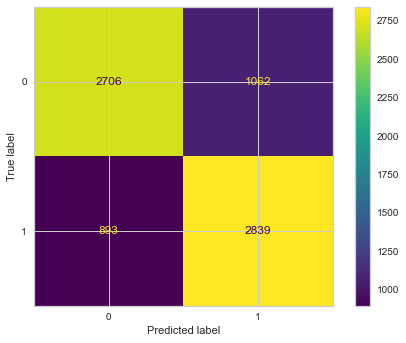

(0.9949777777777777,
 0.7393333333333333,
 0.7277621122789029,
 0.7607181136120043,
 0.7438752783964365)

In [97]:
Train_Test_Scores(RandomForestClassifier(n_jobs=-1),X_train_tfidf,y_train,
                  X_test_tfidf,y_test,True)

In [106]:
# Define classifier and fit it 
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1)

In [118]:
# Get predictors from Random Forest using TF-IDF
y_pred = clf.predict(X_test_tfidf)

In [119]:
# Classification report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73      3768
    Positive       0.72      0.75      0.74      3732

    accuracy                           0.73      7500
   macro avg       0.73      0.73      0.73      7500
weighted avg       0.73      0.73      0.73      7500



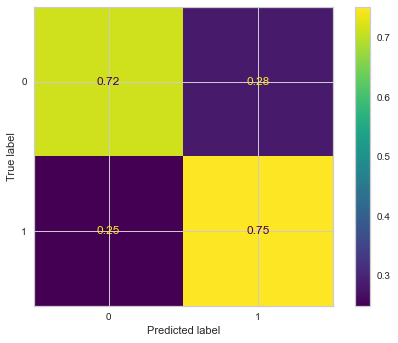

In [120]:
#cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred,normalize='true')

#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[0,1])
#disp.plot()
disp1.plot()
plt.show()

# https://scikit-learn.org/stable/modules/generated/sklearn.
# metrics.ConfusionMatrixDisplay.html

Random Forest shows accuracy of 73%, which means that it correctly classified 73% of the samples in the test set both negative and positive tweets correctly.

##### Please see part 2 (deep learning)  in the colab notebook on GitHub. 
